## **Classification**
Memprediksi Classes

https://www.kaggle.com/datasets/mbharti321/algerian-forest-fires-dataset-updatecsv



## **1.  Import Library**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [ ]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


## **3. Data Analisis dan Cleaning Data**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [ ]:
df['Classes  '].value_counts()

fire             78
not fire         41
not fire          1
not fire          1
Name: Classes  , dtype: int64

In [ ]:
df['Classes'] = df['Classes  '].str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
 14  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 14.4+ KB


In [ ]:
dff = df.drop(['Classes  '], axis=1 )

In [ ]:
dff.index[df['DC'] == '14.6 9']

Int64Index([43], dtype='int64')

In [ ]:
dff.loc[43, 'DC'] = 15.0
# memilih kolom dengan loc, dimana kolom yg dipilih adalah FWI index ke 43 dan mengubah nya kedalam object
dff.loc[43, 'FWI'] = dff['FWI'].mode()[0]

In [ ]:
dff["DC"] = dff["DC"].astype("float64")
dff["FWI"] = dff["FWI"].astype("float64")

In [ ]:
dff.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [ ]:
dff.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [ ]:
# df["Classes"] = df["Classes"].fillna(df["Classes"].mode()[0])
dff['Classes']= dff['Classes'].fillna(dff['Classes'].mode()[0])


In [ ]:
dff.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [ ]:
dff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [ ]:
dff['Classes'].value_counts()

fire        79
not fire    43
Name: Classes, dtype: int64

In [ ]:
classes ={
    'fire' : 0,
    'not fire' : 1
}
dff['Classes'] = dff['Classes'].replace(classes).astype('int64')

In [ ]:
dff.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,1
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1


In [ ]:
df1 = dff.drop(['year'], axis=1)
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,1
1,2,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1
2,3,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1
3,4,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1
4,5,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
118,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
119,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
120,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


## **4. Visualisasi Data**

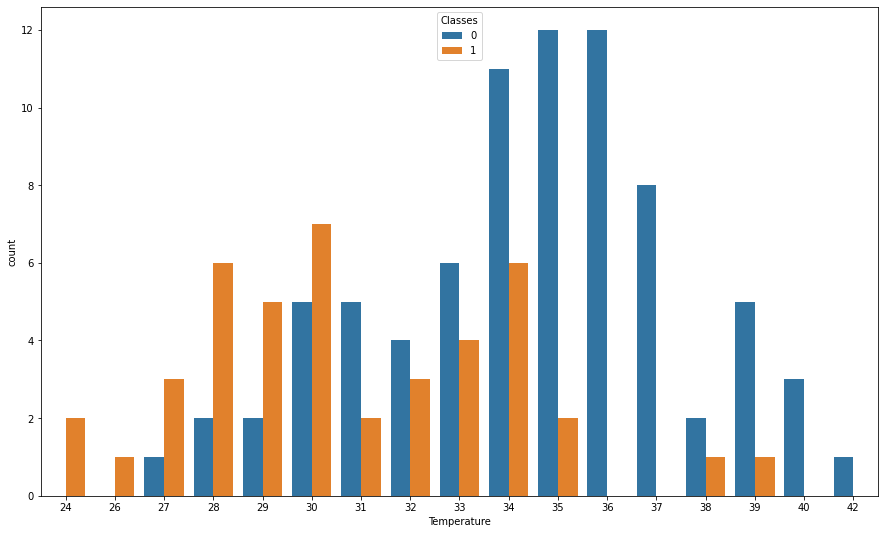

In [ ]:
plt.figure(figsize = (15, 9))
sns.countplot(data = df1, x = "Temperature",  hue = "Classes")
plt.show()

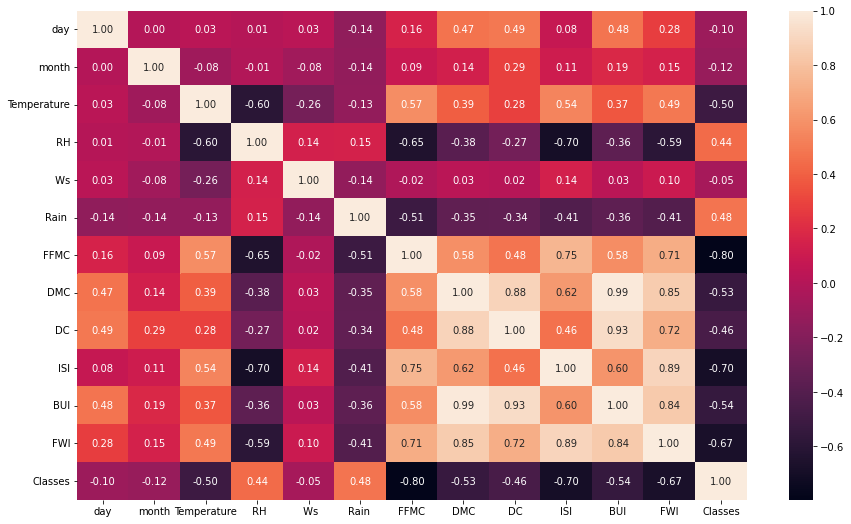

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(df1.corr(method='pearson'), annot = True, fmt='.2f')

## **5. Splititing Data Training Dan Data Testing**

In [ ]:
# Mengapus kolom diagnaosis dan menjadikan kolom diagnosis sebagai target prediksi
x = df1.drop(['Classes'], axis=1)
y= df1['Classes']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                    y,
                                    test_size=0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [ ]:
def models(x_train, y_train):
  # 1 Logistic regression
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(x_train, y_train)

  # 2 Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier()
  tree.fit(x_train, y_train)

  # 3 Random Forest 
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier()
  forest.fit(x_train, y_train)

  # 4 Kneighbors 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)

  # 5 Xgboots
  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(x_train, y_train)

  print('LR:', lr.score(x_train, y_train))
  print('DT:',tree.score(x_train,y_train))
  print('RF:', forest.score(x_train,y_train))
  print('KN:', knn.score(x_train,y_train))
  print('XGB:', xgb.score(x_train,y_train))

  return lr, tree, forest, knn, xgb

In [ ]:
model = models(x_train, y_train)
# Hasil Fitting model

LR: 0.979381443298969
DT: 1.0
RF: 1.0
KN: 0.9484536082474226
XGB: 1.0


In [ ]:
y_pred = model[1].predict(x_test)
print(y_pred)

[0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


In [ ]:
from sklearn. metrics import classification_report, accuracy_score
for i in range(len(model)):
  print('Model: ', i)
  print('Accurray: ', accuracy_score(y_test, model[i].predict(x_test)))
  print(classification_report(y_test, model[i].predict(x_test)))

Model:  0
Accurray:  0.88
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

Model:  1
Accurray:  0.8
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.58      0.74        12

    accuracy                           0.80        25
   macro avg       0.86      0.79      0.79        25
weighted avg       0.86      0.80      0.79        25

Model:  2
Accurray:  0.8
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.58      0.74        12

    accuracy                           0.80        25
   macro avg       0.86      0.79      0.79        2

Dari tampilan diatas kita dapat menyimpulkan:

*   Model pertama yaitu Logistic Regression. Nilai fitting dari model LR adalah 0.97 sedangkan nilai akurasi dari data test adalah 88. Ini termasuk underfitting(model tidak cocok).
*   Model kedua yaitu Decision Tree. Nilai fitting dari model DT adalah 1.0 sedangkan nilai akurasi dari data test adalah 80. Ini termasuk underfitting(model tidak cocok)
*   Model ketiga yaitu Random Forest. Nilai fitting dari model RF adalah 1.0 sedangkan nilai akurasi dari data test adalah 80. Ini termasuk underfitting(model tidak cocok)
*   Model keempat yaitu KNeighbors. Nilai fitting dari model KN adalah 0.94 sedangkan nilai akurasi dari data test adalah 76. Ini termasuk underfitting(model tidak cocok)
*   Model kelima yaitu XGBoots. Nilai fitting dari model XGB adalah 1.0 sedangkan nilai akurasi dari data test adalah 80. Ini termasuk underfitting(model tidak cocok)








